### Exercise 1

In [268]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize as opt

In [269]:
# parameters
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02
A = α * β
K = A ** (1 / (1 - α))

In [270]:
# Uhlig matrices
F = (α * K ** (α - 1)) / (K ** α - K)
G = -(α * K ** (α - 1) * (α + K ** (α - 1))) / (K ** α - K)
H = (α ** 2 * K ** (2 * (α - 1))) / (K ** α - K)
L = -(α * K ** (2 * α - 1)) / (K ** α - K)
M = (α ** 2 * K ** (2 * (α - 1))) / (K ** α - K)
N = ρ
P = (-G + np.sqrt(G ** 2 - 4 * F * H)) / (2 * F)
Q = -(L * N + M) / (F * N + F * P + G)

In [271]:
# set gridspace for values of Kt and zt
Kt_grid = np.linspace(0, 5, 100)
zt_grid = np.linspace(-1, 1, 100)
Kt, zt = np.meshgrid(Kt_grid, zt_grid)

In [272]:
Kt1 = np.zeros((len(Kt_grid), len(zt_grid)))
# find capital next period given Kt and zt
for i, k in enumerate(Kt_grid):
    for j, z in enumerate(zt_grid):
        Kt1[i, j] = K + P * (k - K) + Q * z

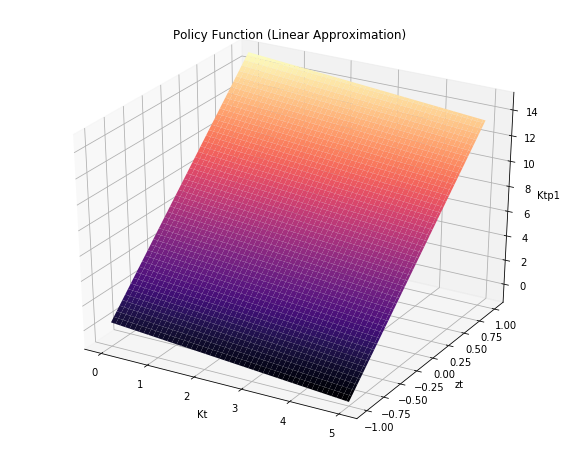

In [273]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Kt, zt, Kt1, cmap='magma')
ax.set_xlabel("Kt")
ax.set_ylabel("zt")
ax.set_zlabel("Ktp1")
ax.set_title("Policy Function (Linear Approximation)")
plt.show()

### Exercise 4

In [274]:
# parameters
γ = 2.5
ξ = 1.5
β = .98
α = .40
a = .5
δ = .10
z_bar = 0
τ = .05

In [275]:
def ss_equations(args, params):
    γ, ξ, β, α, a, δ, z_bar, τ = params
    k, l = args
    
    r = α * k ** (α - 1) * (l * np.exp(z_bar)) ** (1 - α)
    w = (1 - α) * k ** α * np.exp(z_bar) ** (1 - α) * l ** (-α)
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + T
    equation1 = β * ((r - δ) * (1 - τ) + 1) - 1
    equation2 = a * (1 - l) ** (-ξ) - c ** (-γ) * w * (1 - τ)
    
    return equation1, equation2

In [276]:
# returns steady state values for given parameters
def steady_state_vals(params):
    
    k_bar, l_bar = opt.root(ss_equations, np.array([0.5, 0.5]), args=params).x
    r_bar = α * k_bar ** (α - 1) * (l_bar * np.exp(z_bar)) ** (1 - α)
    w_bar = (1 - α) * k_bar ** α * np.exp(z_bar) ** (1 - α) * l_bar ** (-α)
    T_bar = τ * (w_bar * l_bar + (r_bar - δ) * k_bar)
    c_bar = (1 - τ) * (w_bar * l_bar + (r_bar - δ) * k_bar) + T_bar
    y_bar = k_bar ** α * np.exp(z_bar) ** (1 - α)
    i_bar = k_bar - (1 - δ) * k_bar
    
    return np.array([k_bar, l_bar, r_bar, w_bar, T_bar, c_bar, y_bar, i_bar])

In [277]:
k_bar, l_bar, r_bar, w_bar, T_bar, c_bar, y_bar, i_bar = steady_state_vals([γ, ξ, β, α, a, δ, z_bar, τ])
print("k_bar:", k_bar)
print("l_bar:", l_bar)
print("r_bar:", r_bar)
print("w_bar:", w_bar)
print("T_bar:", T_bar)
print("c_bar:", c_bar)
print("y_bar:", y_bar)
print("i_bar:", i_bar)

k_bar: 4.225229025963054
l_bar: 0.5797914531660252
r_bar: 0.1214822771354114
w_bar: 1.3279527682490144
T_bar: 0.043035160306763236
c_bar: 0.8607032061352646
y_bar: 1.7796725499295363
i_bar: 0.4225229025963051


### Exercise 5

In [278]:
derivatives = np.empty((8, 8), dtype=float)

# steady state values
params = np.array([γ, ξ, β, α, a, δ, z_bar, τ])
ss = steady_state_vals(params)

# choose small epsilon
ϵ = 1e-3
for i in range(len(params)):
    params[i] += ϵ
    ss_ϵ = steady_state_vals(params)
    derivatives[:, i] = (ss - ss_ϵ) / ϵ
    params[i] -= ϵ

derivatives

array([[-1.38668619e-01,  8.01419693e-01, -6.62432715e+01,
        -2.60777826e+01,  1.84743920e+00,  4.78973761e+01,
        -2.83899595e+00,  2.32449645e+00],
       [-1.90283011e-02,  1.09971860e-01, -2.70630548e-01,
         7.71335724e-01,  2.53508021e-01, -1.31325057e+00,
         1.90320284e-01,  1.38996464e-01],
       [-1.48300816e-09,  2.22738494e-10,  1.09491728e+00,
         5.44296077e-01, -3.32428529e-10, -9.99999993e-01,
         7.28675027e-02, -2.26367515e-02],
       [ 1.08073550e-08, -1.62336811e-09, -8.03962193e+00,
        -3.98142576e+00,  2.42228460e-09,  7.23787081e+00,
        -5.31287349e-01,  1.64939669e-01],
       [-1.41238014e-03,  8.16268781e-03, -8.73556788e-02,
         2.36365632e-02,  1.88166940e-02, -3.43180433e-02,
         9.59511293e-03,  1.17265530e-02],
       [-2.82476028e-02,  1.63253756e-01, -1.74711358e+00,
         4.72731265e-01,  3.76333880e-01, -6.86360866e-01,
         1.91902259e-01,  2.34531059e-01],
       [-2.33627388e-02,  1.350313

### Exercise 6

In [279]:
# from Chase's notebook
import numpy as np
import scipy.optimize as opt

from collections import namedtuple

params = ["a", "alpha", "beta", "delta", "gamma", "rho", "sigma", "tau", "xi"]
BaselineModel = namedtuple("BaselineModel", params)

m = BaselineModel(0.50, 0.40, 0.98, 0.10, 2.50, 0.90, 0.02, 0.05, 1.5)

In [280]:
def u(m, c, l):
    uc = (c**(1.0 - m.gamma) - 1.0) / (1.0 - m.gamma)
    ul = m.a * ((1.0 - l)**(1.0 - m.xi) - 1.0) / (1.0 - m.xi)
    return uc + ul

def du_dc(m, c, l):
    return c**(-m.gamma)

def du_dl(m, c, l):
    return - m.a * (1.0 - l)**(-m.xi)

def f(m, k, l, z):
    return k**m.alpha * (l * np.exp(z))**(1.0 - m.alpha)

def df_dk(m, k, l, z):
    return m.alpha * (l/k * np.exp(z))**(1.0 - m.alpha)

def df_dl(m, k, l, z):
    return (1.0 - m.alpha) * np.exp(z)**(1.0 - m.alpha) * (k / l)**m.alpha


In [281]:
def Definitions(m, ktp1, kt, lt, zt):
    wt = df_dl(m, kt, lt, zt)
    rt = df_dk(m, kt, lt, zt)
    Tt = m.tau * (wt*lt + (rt - m.delta)*kt)
    ct = (1 - m.tau) * (wt*lt + (rt - m.delta)*kt) + kt + Tt - ktp1

    ct = max(ct, 1e-8)

    return ct, rt, Tt, wt


def CharacteristicEquations(m, ktp2, ltp1, ktp1, lt, kt, ltm1, ztp1, zt):
    ct, rt, Tt, wt = Definitions(m, ktp1, kt, lt, zt)
    ctp1, rtp1, Ttp1, wtp1 = Definitions(m, ktp2, ktp1, ltp1, ztp1)
    rr_tp1 = (rtp1 - m.delta)*(1 - m.tau) + 1.0

    intertemporal_ee = du_dc(m, ct, lt) - m.beta*du_dc(m, ctp1, ltp1)*rr_tp1
    intratemporal_ee = du_dl(m, ct, lt) + du_dc(m, ct, lt)*wt*(1.0 - m.tau)

    return np.array([intertemporal_ee, intratemporal_ee])

In [282]:
def solve_ss(m):
    solve_me = lambda x: CharacteristicEquations(m, x[0], x[1], x[0], x[1], x[0], x[1], 0.0, 0.0)
    sol = opt.root(solve_me, np.array([0.5, 0.85]))

    return sol.x

In [283]:
kbar, lbar = solve_ss(m)

cbar, rbar, Tbar, wbar = Definitions(m, kbar, kbar, lbar, 0.0)

In [284]:
def derivative(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)


def linearize(m, kbar, lbar, eps=1e-6):
    # Compute ss gamma
    x = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
    Gamma_ss = CharacteristicEquations(m, kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0)

    # Allocate space for derivative matrix
    neq = len(Gamma_ss)
    Dmat = np.empty((neq, 8))

    CEsplat = lambda x: CharacteristicEquations(m, *list(x))
    for i in range(8):
        xtilde = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
        xtilde[i] += eps
        Dmat[:, i] = derivative(CEsplat, x, xtilde)

    F = Dmat[:, :2]
    G = Dmat[:, 2:4]
    H = Dmat[:, 4:6]
    L = Dmat[:, 6]
    M = Dmat[:, 7]

    return F, G, H, L, M


In [285]:
F, G, H, L, M = linearize(m, kbar, lbar)

In [286]:
print("F:", F)

F: [[-4.22623769  5.44191867]
 [-0.         -0.        ]]


In [287]:
print("G:", G)

G: [[  8.5666152   -5.61221554]
 [  5.33163184 -14.89888287]]


In [288]:
print("H:", H)

H: [[-4.31700912 -0.        ]
 [-5.27237248 -0.        ]]


In [289]:
print("L:", L)

L: [ 3.1551835 -0.       ]


In [290]:
print("M:", M)

M: [-3.25392039 -3.00365571]


In [291]:
N = ρ
print("N:", N)

N: 0.95


In [292]:
# DISCLAIMER: I copied this part from Natasha's code because I
# couldn't get it to work and I needed to move on

def solve_P(P, F, G, H, M):
    P = P.reshape((2, 2))
    eq1 = F @ P @ P + G @ P + H
    return eq1.flatten()

def solve_Q(Q, F, ρ, P, G, L):
    return F @ Q * ρ + (F @ P + G) @ Q + (L * ρ + M)

x0 = np.zeros(4)
P = opt.root(solve_P, x0, args=(F, G, H, M)).x.reshape(2, 2)

x0 = np.zeros(2)
Q = opt.root(solve_Q, x0, args=(F, ρ, P, G, L)).x

In [293]:
print("P:", P)

P: [[ 0.91529275  0.        ]
 [-0.02633543  0.        ]]


In [294]:
print("Q:", Q)

Q: [ 0.43819003 -0.04479449]


### Exercise 7

In [295]:
from numba import njit

In [296]:
N = 10000
T = 250
σ_z = np.sqrt(0.0004)

@njit
def simulate_ts(N, T, σ_z):
    X_vec = np.zeros((T, 2))
    l_vec = np.zeros((T, N))
    z_vec = np.zeros(T)
    k_vec = np.zeros((T, N))
    for n in range(N):
        k =  A ** (1 / (1 - α))
        z_vec[0] = 0
        for t in range(1, T):
            z_vec[t] = ρ * z_vec[t-1] + np.random.normal() * σ_z
            X_vec[t] = P @ X_vec[t-1, :] + Q * z_vec[t]

        k_vec[:, n] = np.exp(X_vec[:, 0]) * kbar
        l_vec[:, n] = np.exp(X_vec[:, 1]) * lbar

        return k_vec, l_vec